In [1]:
# build a simple linear regression in python
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
import warnings
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [2]:
#read in housedata data
df = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
df.shape

(17290, 21)

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df['date']

0        20141006T000000
1        20140821T000000
2        20140815T000000
3        20150331T000000
4        20140714T000000
              ...       
17285    20150303T000000
17286    20140520T000000
17287    20140514T000000
17288    20141204T000000
17289    20150116T000000
Name: date, Length: 17290, dtype: object

In [7]:
df['date'] = df['date'].str[:8]

In [8]:
df["date"]= pd.to_datetime(df["date"]) 

In [9]:
df['date']

0       2014-10-06
1       2014-08-21
2       2014-08-15
3       2015-03-31
4       2014-07-14
           ...    
17285   2015-03-03
17286   2014-05-20
17287   2014-05-14
17288   2014-12-04
17289   2015-01-16
Name: date, Length: 17290, dtype: datetime64[ns]

In [15]:
df_tgt = df.id
df_feat = df.drop(['id'], axis=1)

In [11]:
df.isna().head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isna().mean()

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [24]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [25]:
mlr_model = ols(formula='price~bedrooms+bathrooms+sqft_living+sqft_lot', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     4504.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:35:10   Log-Likelihood:            -2.4019e+05
No. Observations:               17290   AIC:                         4.804e+05
Df Residuals:                   17285   BIC:                         4.804e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.037e+04   7807.509      9.014      0.000    5.51e+04    8.57e+04
bedrooms    -5.856e+04   2609.099    -22.443      0.000   -6.37e+04   -5.34e+04
bathrooms    2995.8371   3980.941      0.753      0.452   -4807.210    1.08e+04
sqft_living   320.4711      3.545     90.413      0.000     313.523     327.419
sqft_lot       -0.3630      0.048     -7.586      0.000      -0.457      -0.269
==============================================================================
Omnibus:                    11964.558   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           447810.213
Skew:                           2.852   Prob(JB):                         0.00
Kurtosis:                      27.271   Cond. No.                     1.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

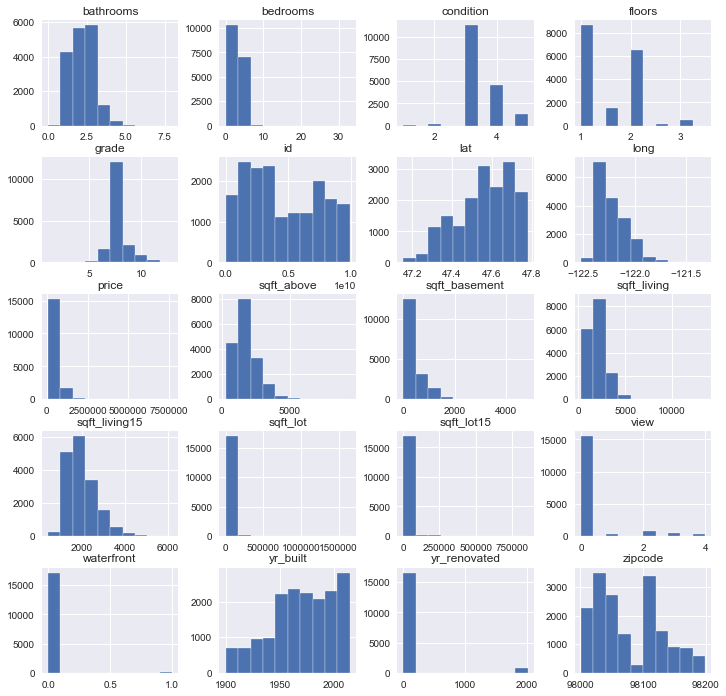

In [27]:

warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df.hist(ax = ax);

In [28]:
df.drop(columns=['lat', 'long'], inplace=True)

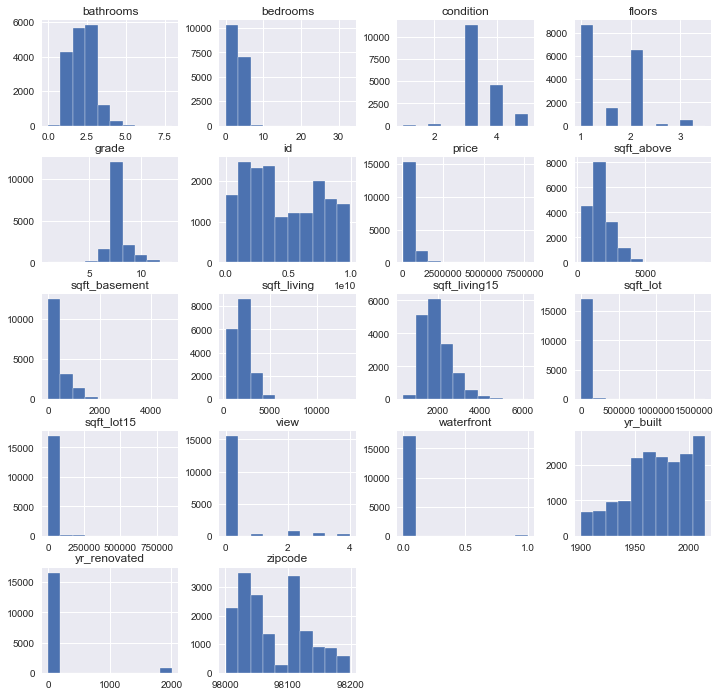

In [29]:

warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df.hist(ax = ax);

In [30]:
df.nunique()

id               17176
date               371
price             3534
bedrooms            13
bathrooms           30
sqft_living        947
sqft_lot          8428
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         867
sqft_basement      290
yr_built           116
yr_renovated        69
zipcode             70
sqft_living15      714
sqft_lot15        7582
dtype: int64